RECOMMENDATION SYSTEM FOR A MUSIC APP                          
FILIPPOU GEORGIOS,
MAVRODI DIMITRA,
PETROGLOU SPYRIDON,

Our proposal for the project is to make a music app that it takes into
account some key factors and it will recommend the user what song or
music he would like to listen next.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
ls

 big_array.npy
 Boston.csv
'Colab Notebooks'/
 Data/
'Lab 4 - ANN regression - classification'/
 model_plot1.png
 model_plot.png
 MusicDataSet.csv
 pima-indians-diabetes.data.csv
 ratings.csv
 Team_J_Final_Project_Project_Milestone_2-1.ipynb
 Team_J_Final_Project_Project_Milestone_2.ipynb
 tolp_ledom.png
 user_items.npy
 users.csv
'Ειδικό Θέμα - Σκάκι.pdf'
'υλικό για ομάδα 5-συναρτήσεις-σύστημα συν-νων.docx.gdoc'


Fist We include all necessary libraries

In [6]:
#Import all necessary libraries

import numpy as np
from numpy import loadtxt
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors

import csv
import random
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
from scipy.sparse.linalg import svds
from math import sqrt
from tabulate import tabulate

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers, utils

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

Now, we load our data set and we will print their data

In [7]:
# Read the CSV file into a DataFrame
music_dataset = pd.read_csv("MusicDataSet.csv")

# Define the desired column order
desired_column_order = [
    'id', 'name', 'artists', 'year', 'release_date', 'duration_ms',
    'acousticness', 'danceability', 'liveness', 'loudness', 'energy',
    'instrumentalness', 'tempo', 'speechiness', 'mode', 'explicit',
    'valence', 'key', 'popularity'
]

# Reorganize the columns in the DataFrame
music_dataset = music_dataset[desired_column_order]

# Rename columns using a dictionary
column_mapping = {
    'mode': 'has_lyrics',
    'tempo': 'bpm',
    'key': 'voice_pitch'
}
music_dataset.rename(columns=column_mapping, inplace=True)

In [8]:
# Display Music DataSet
music_dataset

,id,name,artists,year,release_date,duration_ms,acousticness,danceability,liveness,loudness,energy,instrumentalness,bpm,speechiness,has_lyrics,explicit,valence,voice_pitch,popularity
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,1921,831667,0.98200,0.279,0.6650,-20.096,0.211,0.878000,80.954,0.0366,1,0,0.0594,10,4
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],1921,1921,180533,0.73200,0.819,0.1600,-12.441,0.341,0.000000,60.936,0.4150,1,0,0.9630,7,5
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,1921,500062,0.96100,0.328,0.1010,-14.850,0.166,0.913000,110.339,0.0339,1,0,0.0394,3,5
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],1921,1921,210000,0.96700,0.275,0.3810,-9.316,0.309,0.000028,100.109,0.0354,1,0,0.1650,5,3
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],1921,1921,166693,0.95700,0.418,0.2290,-10.096,0.193,0.000002,101.665,0.0380,1,0,0.2530,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0KkIkfsLEJbrcIhYsCL7L5,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",2020,2020-05-29,301714,0.08460,0.786,0.0822,-3.702,0.808,0.000289,105.029,0.0881,1,0,0.6080,7,72
170649,0OStKKAuXlxA0fMH54Qs6E,Halloweenie III: Seven Days,['Ashnikko'],2020,2020-10-23,150654,0.20600,0.717,0.1010,-6.020,0.753,0.000000,137.936,0.0605,1,0,0.7340,7,68
170650,4BZXVFYCb76Q0Klojq4piV,AYA,['MAMAMOO'],2020,2020-11-03,211280,0.10100,0.634,0.2580,-2.226,0.858,0.000009,91.688,0.0809,0,0,0.6370,4,76
170651,5SiZJoLXp3WOl3J4C8IK0d,Darkness,['Eminem'],2020,2020-01-17,337147,0.00998,0.671,0.6430,-7.161,0.623,0.000008,75.055,0.3080,1,1,0.1950,2,70


In [9]:
# Read the CSV file into a DataFrame

users_dataset = pd.read_csv("users.csv")

# Define the desired column order
desired_column_order = [
    'id', 'name', 'screen_name', 'followers_count', 'friends_count', 'favourites_count',
    'listed_count', 'created_at', 'lang'
]

# Reorganize the columns in the DataFrame
users_dataset = users_dataset[desired_column_order]

In [10]:
# Display User DataSet
users_dataset

,id,name,screen_name,followers_count,friends_count,favourites_count,listed_count,created_at,lang
0,3610511,Davide Dellacasa,braddd,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,it
1,5656162,Simone Economo,eKoeS,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,en
2,5682702,tacone,tacone_,264,87,323,16,Tue May 01 11:53:40 +0000 2007,en
3,6067292,alesaura,alesstar,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,en
4,6015122,Angelo,PerDiletto,62,64,13,0,Sun May 13 19:52:00 +0000 2007,it
...,...,...,...,...,...,...,...,...,...
1476,1127280169,Frilaif Official,frilaif,208,124,14,2,Mon Jan 28 07:13:47 +0000 2013,it
1477,1156344000,♔♥HeartsQueen♥♔,Stronzetta__,22,55,0,0,Thu Feb 07 07:27:08 +0000 2013,it
1478,1169114810,angelagervasi,angelagervasi2,0,4,3,0,Mon Feb 11 14:50:19 +0000 2013,it
1479,1212975186,Midnight,Movie1O,2,4,0,0,Sat Feb 23 17:46:55 +0000 2013,it


Next we will create a csv file that will contain a column with the user id, a column with the song id and a random rate for it.

In [11]:
# Create the ratings.csv file. It will have the user Id, song Id and the corresponding rate

fields = ['user_id', 'song_id', 'rate']
filename = "ratings.csv"
N = 250000

all_song_ids = music_dataset['id'].tolist()

additional_repeat = 3

# Add some IDs to the list multiple times
while len(all_song_ids) < N:
    additional_ids = random.sample(all_song_ids, additional_repeat)
    all_song_ids.extend(additional_ids)

# Shuffle the final list
random.shuffle(all_song_ids)

with open(filename, 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fields, delimiter=',', quoting=csv.QUOTE_MINIMAL)
    writer.writeheader()

    for _ in range(N):

        random_row = {
            'user_id': users_dataset.sample(n=1)['id'].iloc[0],
            'song_id': all_song_ids.pop(),
            'rate': round(random.uniform(0.0, 5.0), 1)
        }

        writer.writerow(random_row)


In [12]:
#Print unique values for song id

ratings_dataset = pd.read_csv("ratings.csv")

ratings_dataset['song_id'].nunique()

170653

Now, we create a data frame that has all user IDs as a row and all song IDs as a column. We replace the NAN values with zeros.

In [18]:
ratings_dataset = ratings_dataset.pivot_table(index="user_id", columns="song_id", values="rate")
missing_cols = list(set(music_dataset.index) - set(ratings_dataset.columns))

ratings_dataset = ratings_dataset[sorted(ratings_dataset.columns)]

df_filled = ratings_dataset.fillna(0)

df_filled

song_id,000G1xMMuwxNHmwVsBdtj1,000GyYHG4uWmlXieKLij8u,000Npgk5e2SgwGaIsN3ztv,000ZxLGm7jDlWCHtcXSeBe,000jBcNljWTnyjB4YO7ojf,000mGrJNc2GAgQdMESdgEc,000u1dTg7y1XCDXi80hbBX,000x2qE0ZI3hodeVrnJK8A,0012iPKNQl1zhdYwq3iVa1,00147h65HDYSncB3byziPP,...,7zxRMhXxJMQCeDDg0rKAVo,7zxUtz2BCbKohJpOcwNNRX,7zxikeAavSLQVGocbK2nau,7zxiwcqLQyWcLdThrsYklu,7zycSpvjDcqh6YT1FEl2kY,7zyqJJ0QwajaHaPLCqZFXN,7zywdG4ysfC5XNBzjQAo2o,7zzbPkvxJ6iANIxcSz60rm,7zzbfi8fvHe6hm342GcNYl,7zzuPsjj9L3M7ikqGmjN0D
user_id,,,,,,,,,,,,,,,,,,,,,
3610511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5656162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5682702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6015122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6067292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213937306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1216631100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1219155151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Print Ratings numbers

print(np.count_nonzero(df_filled))

247449


Here we remove the unneeded columns (string columns) from the music dataset.

In [13]:
#We need to remove the string columns from the array
important_features = pd.DataFrame(music_dataset)

important_features = music_dataset.drop('id', axis=1)
important_features = important_features.drop('name', axis=1)
important_features = important_features.drop('artists', axis=1)
important_features = important_features.drop('release_date', axis=1)

important_features

,year,duration_ms,acousticness,danceability,liveness,loudness,energy,instrumentalness,bpm,speechiness,has_lyrics,explicit,valence,voice_pitch,popularity
0,1921,831667,0.98200,0.279,0.6650,-20.096,0.211,0.878000,80.954,0.0366,1,0,0.0594,10,4
1,1921,180533,0.73200,0.819,0.1600,-12.441,0.341,0.000000,60.936,0.4150,1,0,0.9630,7,5
2,1921,500062,0.96100,0.328,0.1010,-14.850,0.166,0.913000,110.339,0.0339,1,0,0.0394,3,5
3,1921,210000,0.96700,0.275,0.3810,-9.316,0.309,0.000028,100.109,0.0354,1,0,0.1650,5,3
4,1921,166693,0.95700,0.418,0.2290,-10.096,0.193,0.000002,101.665,0.0380,1,0,0.2530,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,2020,301714,0.08460,0.786,0.0822,-3.702,0.808,0.000289,105.029,0.0881,1,0,0.6080,7,72
170649,2020,150654,0.20600,0.717,0.1010,-6.020,0.753,0.000000,137.936,0.0605,1,0,0.7340,7,68
170650,2020,211280,0.10100,0.634,0.2580,-2.226,0.858,0.000009,91.688,0.0809,0,0,0.6370,4,76
170651,2020,337147,0.00998,0.671,0.6430,-7.161,0.623,0.000008,75.055,0.3080,1,1,0.1950,2,70


Here we plot a duration histogram for all songs in the Dataset.

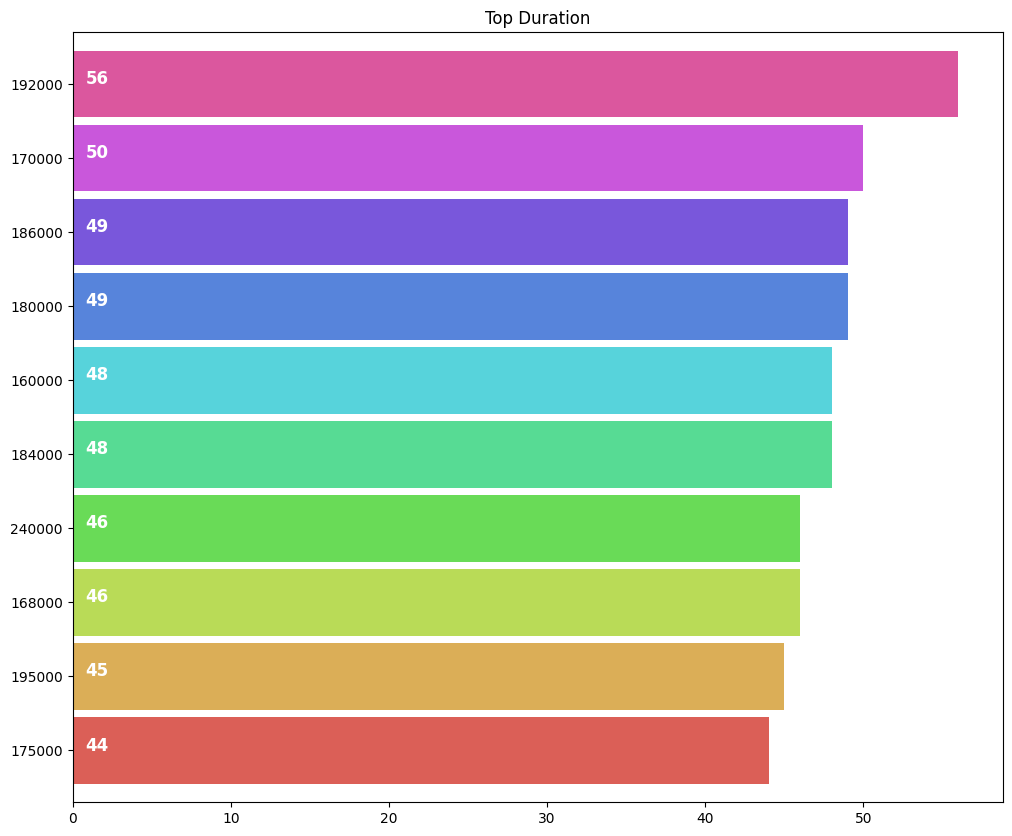

In [23]:
plt.subplots(figsize=(12, 10))
list1 = []

for i in important_features['duration_ms']:
    if isinstance(i, (list, tuple)):
        list1.extend(i)
    else:
        list1.append(i)

ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('hls', 10))

for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values):
    ax.text(0.8, i, v, fontsize=12, color='white', weight='bold')

plt.title('Top Duration')
plt.show()


Here we use the Seaborn library to graphically print feature correlation

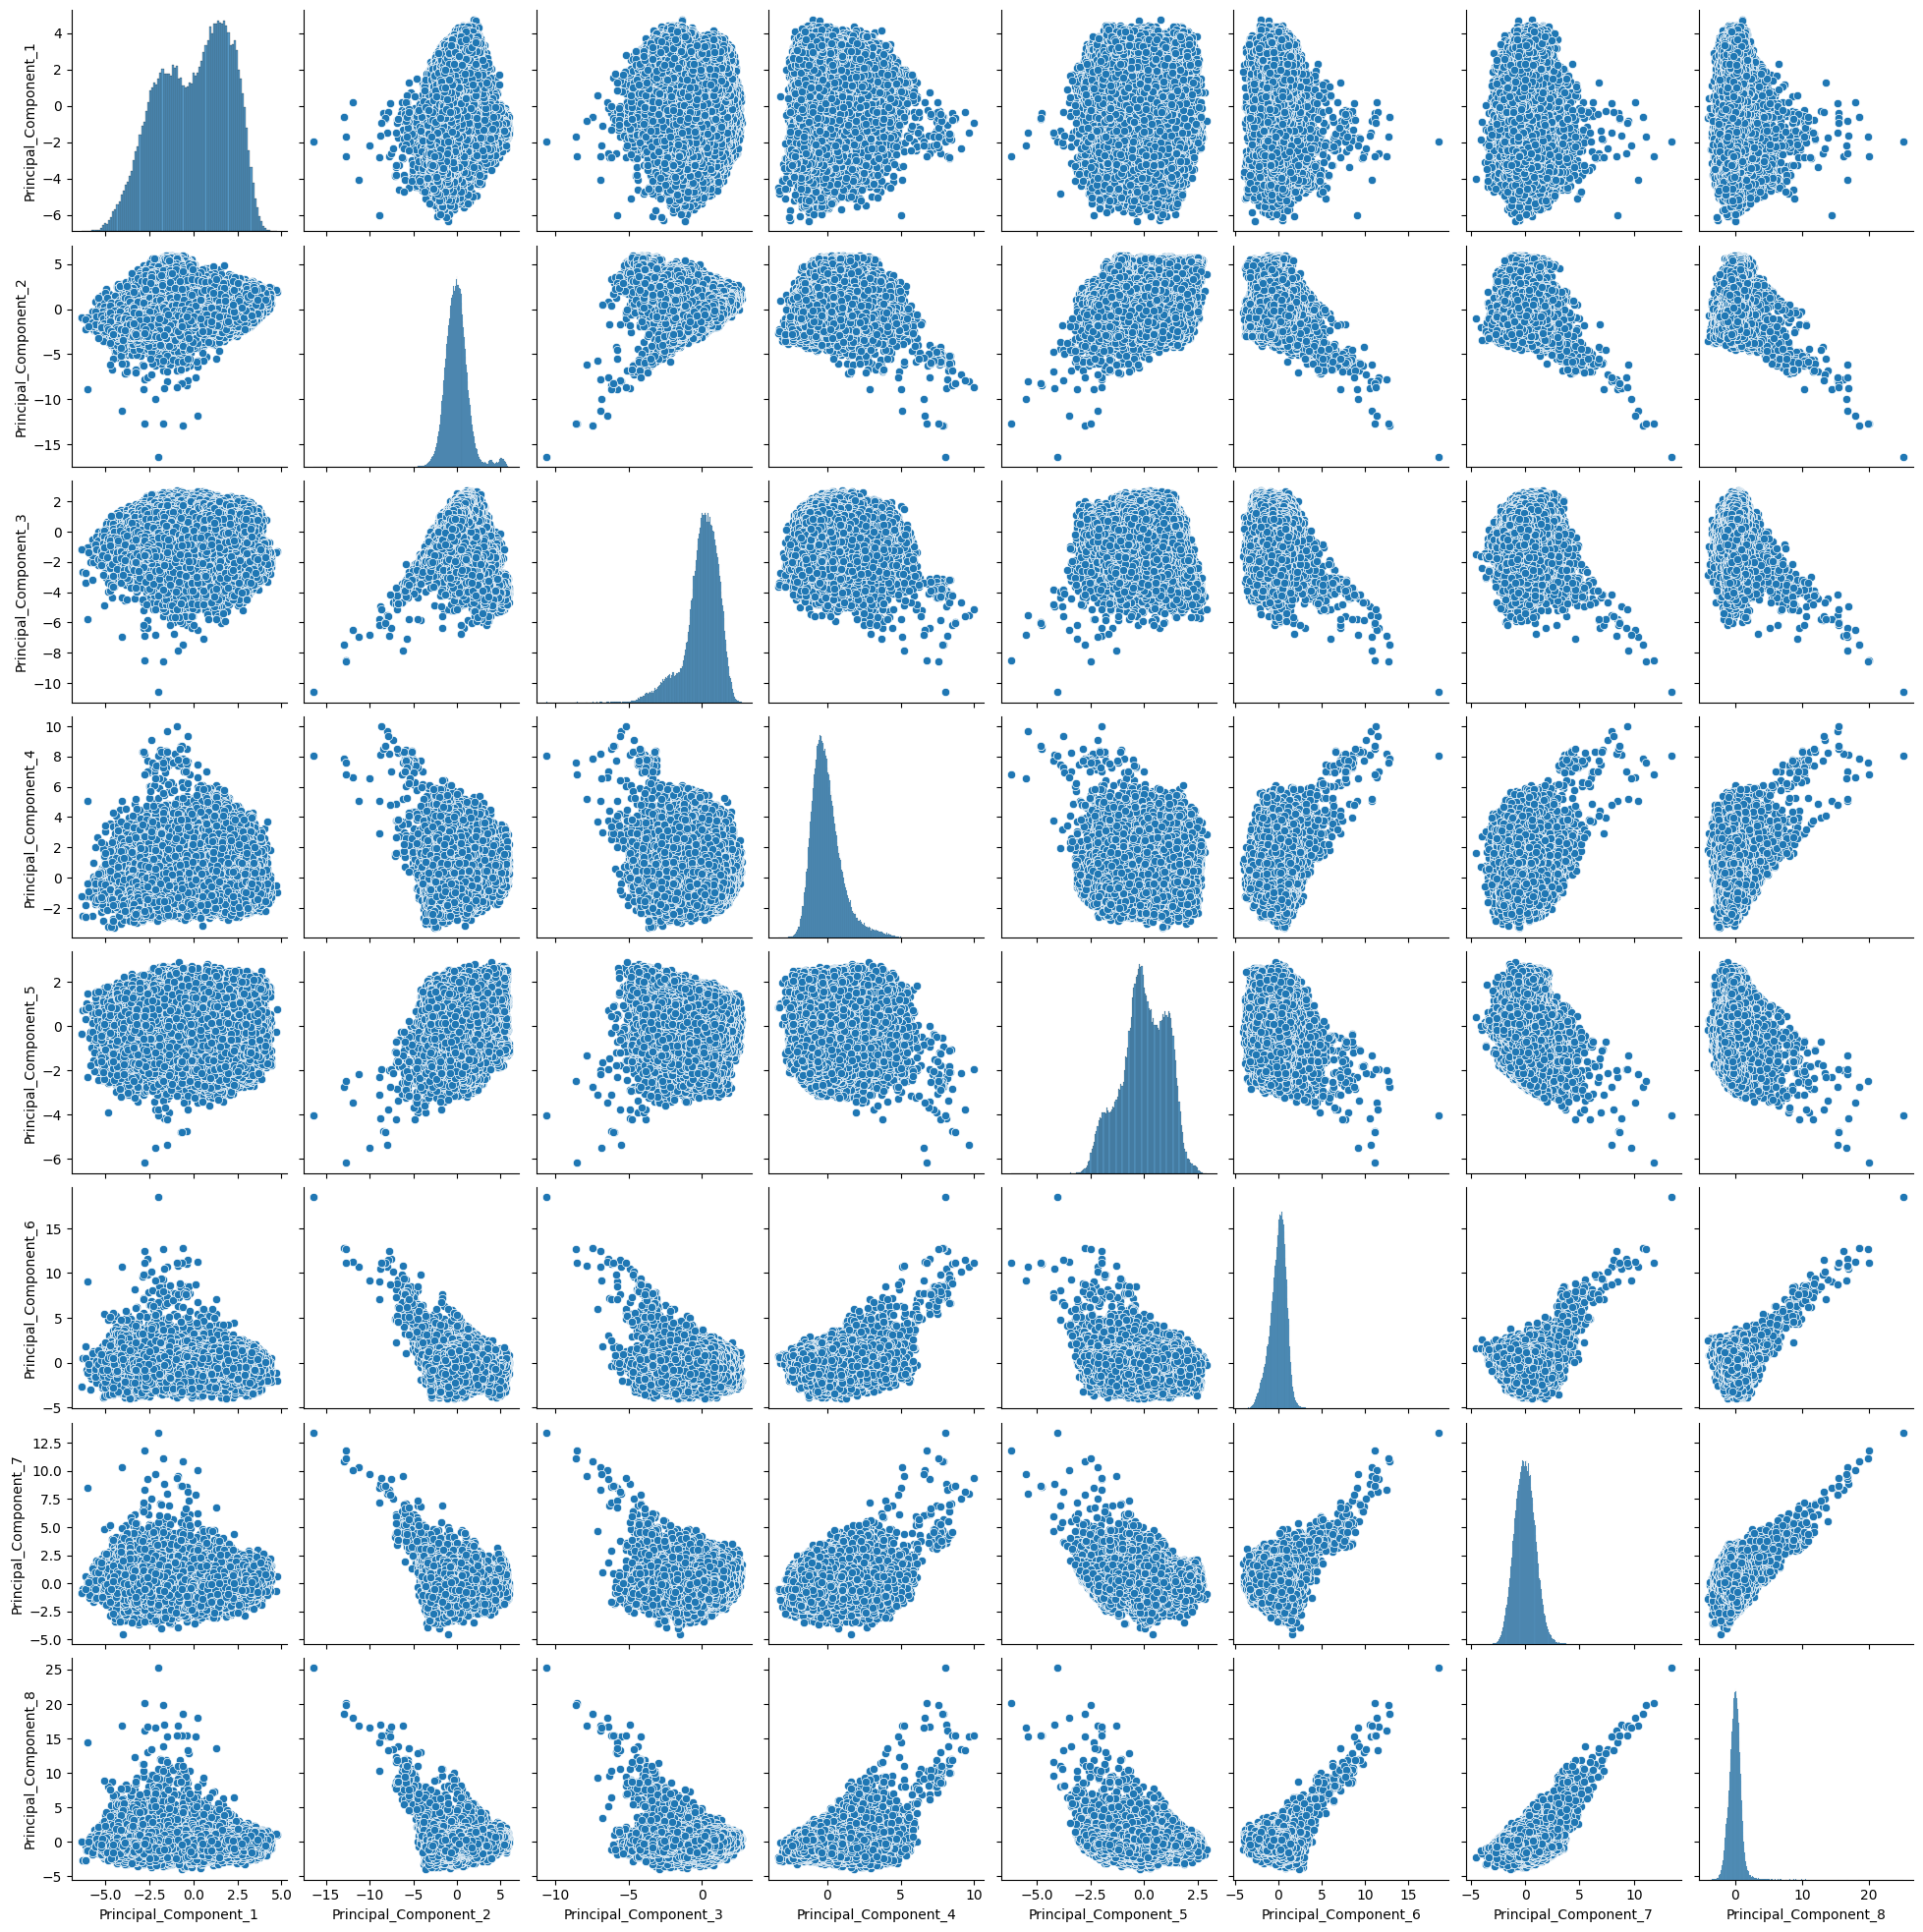

<Figure size 400x400 with 0 Axes>

In [32]:
sns.pairplot(df_pca)
plt.figure(figsize=(4, 4))
plt.show()

Now we create a html file with inportant information about music Dataset's features.

In [ ]:
# Informations about variables

profile = ProfileReport(important_features)
profile.to_file("dataset_information.html")

C:\minicoda3\lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The csv file above (MusicDataset.csv) is the database that spotify uses for this job. We have chosen this database because it has a lot of key factors such as 'bpm', 'has lyrics', 'voice pitch' and many more. Some of these featues are described in the next slides

As we have said before, one important feature that needs to be taken into account is bpm (how fast the
song is). Many users may like only fast pace songs, while others low pace
songs.

We can also increase the number of factors by adding one more factor that
indicates whether the song has lyrics or it is only pure instrument music
(like classical music) to attract pure instrument music enjoyers.

Furthermore, we would also like to add features like type of voice,
but because there are too many voice types, we will focus on three
parameters: pitch, gender and age.

One more feature that spotify uses in its database and we would also like to include in our analysis is the instruments that are used in the songs
(guitar, piano etc) so that the app can provide recommendations to the
user based on the instrument that is used in a song.

So, in our project we are going to use these features (and some more), store them in the
profile of the user and then we can also weight them for more accurate
results.

To weight the features, we can ask the user to rate the songs that he is
listening to.

This is where we standardize your data.

In [14]:
# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(important_features)

# Convert the standardized data back to a DataFrame
columns=['year', 'duration_ms', 'acousticness', 'danceability', 'liveness', 'loudness', 'energy',
        'instrumentalness', 'bpm', 'speechiness', 'has_lyrics', 'explicit', 'valence', 'voice_pitch', 'popularity']

df_std = pd.DataFrame(X_std, columns=columns)

In [15]:
# Print dataset after Standardize

df_std.head()

,year,duration_ms,acousticness,danceability,liveness,loudness,energy,instrumentalness,bpm,speechiness,has_lyrics,explicit,valence,voice_pitch,popularity
0,-2.15247,4.763146,1.276187,-1.467013,2.626719,-1.514237,-1.013988,2.268102,-1.169307,-0.379706,0.643912,-0.303955,-1.782825,1.365588,-1.256808
1,-2.15247,-0.399747,0.611347,1.598779,-0.262229,-0.170766,-0.528270,-0.532771,-1.821180,1.945481,0.643912,-0.303955,1.650688,0.512123,-1.210993
2,-2.15247,2.133824,1.220340,-1.188820,-0.599749,-0.593551,-1.182122,2.379754,-0.212404,-0.396297,0.643912,-0.303955,-1.858821,-0.625830,-1.210993
3,-2.15247,-0.166101,1.236296,-1.489722,1.002043,0.377680,-0.647832,-0.532682,-0.545537,-0.387080,0.643912,-0.303955,-1.381564,-0.056853,-1.302624
4,-2.15247,-0.509485,1.209703,-0.677855,0.132499,0.240788,-1.081242,-0.532765,-0.494867,-0.371104,0.643912,-0.303955,-1.047180,-0.625830,-1.348440


And now we will apply PCA for further dimensionality removal.

In [16]:
# Compute the covariance matrix
cov_matrix = np.cov(X_std.T)

# Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Get the indices that would sort the eigenvalues in descending order
eigenvalue_indices = np.argsort(eigenvalues)[::-1]

# Sort eigenvalues and eigenvectors accordingly
eigenvalues_sort = eigenvalues[eigenvalue_indices]
eigenvectors_sort = eigenvectors[:, eigenvalue_indices]

# Decide the number of components to keep
useful_pcs = 0
useful_pcs_array = []

for i in eigenvalues_sort:
    if useful_pcs <= 80.0:
        useful_pcs = useful_pcs + (i / sum(eigenvalues)) * 100
        useful_pcs_array.append(i)

print("Useful PCs Array:", useful_pcs_array)
print("\n")
print("Variance Explained:", [(i / sum(eigenvalues)) * 100 for i in eigenvalues_sort])
print("\n")
print("Eigenvalues:", eigenvalues_sort)

# According to the PCA analysis, you are going to maintain the first 8 Principal Components

selected_eigenvectors = eigenvectors_sort[:, :len(useful_pcs_array)]

# Project the standardized data onto the new feature space
X_pca = X_std.dot(selected_eigenvectors)

# Convert to a DataFrame for easier handling
df_pca = pd.DataFrame(X_pca, columns=['Principal_Component_{}'.format(i) for i in range(1, 9)])

Useful PCs Array: [3.9997473658923655, 1.8055779368432074, 1.420581735449648, 1.1745214838946207, 1.1144679984407615, 0.93828727702339, 0.9176700268941261, 0.8425674305071447]


Variance Explained: [26.664826186638546, 12.037115709584837, 9.470489407079606, 7.830097342544418, 7.4297431188791645, 6.2552118587072645, 6.117764329938002, 5.617083287954907, 5.0161697875270885, 4.170231616589192, 3.421505778179458, 2.2612112986157293, 2.0246111588867937, 0.8835706365183428, 0.800368482356658]


Eigenvalues: [3.99974737 1.80557794 1.42058174 1.17452148 1.114468   0.93828728
 0.91767003 0.84256743 0.75242988 0.62553841 0.51322887 0.33918368
 0.30369345 0.13253637 0.12005598]


Print Dataset after PCA. Now We have 8 columns in Music Dataset.

In [17]:
df_pca.head()

,Principal_Component_1,Principal_Component_2,Principal_Component_3,Principal_Component_4,Principal_Component_5,Principal_Component_6,Principal_Component_7,Principal_Component_8
0,-4.282668,-2.295402,-1.761012,3.326086,-1.164322,2.380347,0.066842,2.778565
1,-1.393690,3.515663,0.614123,-0.399072,-0.074618,1.705827,-0.683668,0.870015
2,-3.852971,-1.734295,-0.408367,0.524437,0.254556,0.406444,1.440319,1.434515
3,-2.538965,-0.304841,0.215672,1.513418,0.685244,0.154988,-1.187538,-0.398327
4,-2.551295,0.275455,0.580249,0.442537,0.994640,0.132456,-0.602359,-0.394506


Now we use SVC algorithm in order to find the missing rating.

In [33]:
# SVC in Rating Dataset

num_factors = 3

# Perform matrix factorization using SVD
U, sigma, Vt = svds(df_filled.to_numpy(), k=num_factors)

sigma = np.diag(sigma)

# Preview the outputs of SVD
U, sigma, Vt

(array([[-3.86400417e-03, -3.45841659e-04,  2.09609428e-02],
        [ 3.84753346e-02, -9.53973168e-01,  5.95001814e-02],
        [-4.94619953e-03,  2.46787857e-03,  2.02859170e-02],
        ...,
        [-3.28334690e-04,  4.08279201e-03,  2.19290485e-02],
        [ 9.35122523e-04,  4.37201308e-03,  2.54695164e-02],
        [-9.85234886e-04,  7.18022428e-04,  1.26826056e-02]]),
 array([[43.28836235,  0.        ,  0.        ],
        [ 0.        , 43.88733235,  0.        ],
        [ 0.        ,  0.        , 49.57701355]]),
 array([[-2.10975664e-05, -2.17101255e-04, -3.43283897e-04, ...,
         -3.93746934e-04, -1.35696952e-04, -1.71958580e-03],
        [ 1.84125570e-04,  2.96507166e-04,  2.23988310e-04, ...,
          3.01026531e-04,  1.76891206e-05,  9.14731246e-04],
        [ 2.92920784e-03,  1.45395533e-03,  1.27588780e-03, ...,
          5.02507912e-03,  1.13438760e-03,  3.91781008e-03]]))

The predicted score from the algorithm above is:

In [34]:
# Predicted ratings
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=ratings_dataset.columns, index=ratings_dataset.index)

predicted_ratings_df

song_id,000G1xMMuwxNHmwVsBdtj1,000GyYHG4uWmlXieKLij8u,000Npgk5e2SgwGaIsN3ztv,000ZxLGm7jDlWCHtcXSeBe,000jBcNljWTnyjB4YO7ojf,000mGrJNc2GAgQdMESdgEc,000u1dTg7y1XCDXi80hbBX,000x2qE0ZI3hodeVrnJK8A,0012iPKNQl1zhdYwq3iVa1,00147h65HDYSncB3byziPP,...,7zxRMhXxJMQCeDDg0rKAVo,7zxUtz2BCbKohJpOcwNNRX,7zxikeAavSLQVGocbK2nau,7zxiwcqLQyWcLdThrsYklu,7zycSpvjDcqh6YT1FEl2kY,7zyqJJ0QwajaHaPLCqZFXN,7zywdG4ysfC5XNBzjQAo2o,7zzbPkvxJ6iANIxcSz60rm,7zzbfi8fvHe6hm342GcNYl,7zzuPsjj9L3M7ikqGmjN0D
user_id,,,,,,,,,,,,,,,,,,,,,
3610511,0.003045,0.001543,0.001380,0.002123,0.000316,0.001483,0.001047,0.002449,0.000484,0.002545,...,0.000453,0.001774,0.000727,0.001025,0.000492,0.002047,0.003186,0.005283,0.001201,0.004345
5656162,0.000897,-0.008487,-0.006186,0.001626,-0.000700,-0.011284,-0.006759,-0.009386,-0.000934,-0.006423,...,0.001751,0.060832,-0.001838,-0.001241,-0.001109,-0.003882,-0.013575,0.001564,0.002380,-0.029604
5682702,0.002970,0.001541,0.001381,0.002067,0.000312,0.001402,0.001025,0.002362,0.000478,0.002516,...,0.000440,0.001519,0.000714,0.001016,0.000489,0.002027,0.003179,0.005171,0.001172,0.004407
6015122,0.004043,0.002045,0.001799,0.002821,0.000418,0.002301,0.001480,0.003494,0.000637,0.003358,...,0.000586,0.002272,0.000978,0.001327,0.000637,0.002670,0.004178,0.006955,0.001567,0.005592
6067292,0.002540,0.001271,0.001116,0.001774,0.000261,0.001474,0.000931,0.002214,0.000398,0.002096,...,0.000369,0.001505,0.000613,0.000827,0.000396,0.001664,0.002596,0.004361,0.000983,0.003443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213937306,0.006650,0.003551,0.003222,0.004614,0.000711,0.002658,0.002206,0.004951,0.001092,0.005745,...,0.000995,0.002912,0.001599,0.002353,0.001138,0.004673,0.007368,0.011684,0.002653,0.010517
1216631100,0.003270,0.001667,0.001496,0.002279,0.000341,0.001538,0.001114,0.002591,0.000522,0.002745,...,0.000488,0.001857,0.000781,0.001110,0.000533,0.002213,0.003449,0.005686,0.001294,0.004736
1219155151,0.003218,0.001637,0.001432,0.002245,0.000333,0.001919,0.001206,0.002847,0.000507,0.002677,...,0.000461,0.001721,0.000783,0.001051,0.000505,0.002120,0.003331,0.005523,0.001238,0.004448


In [62]:
# Function to recommend items for a user that they haven't rated yet
def recommend_items(user_id, ratings, predicted_ratings, num_recommendations=5):
    # Get the user's ratings
    user_ratings = ratings.loc[user_id]

    # Get the predicted ratings for the user
    user_predicted_ratings = predicted_ratings.loc[user_id]

    # Create a DataFrame that only contains items the user hasn't rated yet
    user_unrated_items = user_ratings[user_ratings == 0]

    # Get the predicted ratings for items the user hasn't rated
    recommendations = user_predicted_ratings.loc[user_unrated_items.index]

    # Sort the predicted ratings in descending order
    recommendations = recommendations.sort_values(ascending=False)

    # Get the top 'num_recommendations' items
    top_recommendations = recommendations.head(num_recommendations)

    return top_recommendations

# Recommend items for User 1
recommendations_user_1 = recommend_items(5656162, df_filled, predicted_ratings_df, 5)
recommendations_user_1


song_id
2cIdgfqj0JEQkvy8vaurg1    0.400059
0lqbEiDachHurojRTwLzqk    0.370495
0w91MsXVQvuTdKf9BKg6f6    0.351438
1SyE2vO385jnz5R8ZYq2zy    0.342930
032d7xImO9LR7JdRKI1wRG    0.342373
Name: 5656162, dtype: float64

Here We aply Linear Regression.

In [18]:
# List of the specific IDs we're looking for

N = 50000
specific_ids = [None] * N

numpy_music_dataset = music_dataset.values

for i in range(N):
    random_index = random.randint(0, len(music_dataset) - 1)
    specific_ids[i] = numpy_music_dataset[random_index][0]


columns=['1']

# We use music dataset and no df_pca because this has the column "ID"
selected_array = np.where(music_dataset['id'].isin(specific_ids), 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X_pca, selected_array, random_state=0)

# Create and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lin_reg.predict(X_test)

print("Predictive Values: ")
print(y_pred)
print("\n")

# Calculate RMSE for the model
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE for Multiple Linear Regression: {rmse}')

Predictive Values: 
[0.25537129 0.25954598 0.25510447 ... 0.25096399 0.25017026 0.25008795]


RMSE for Multiple Linear Regression: 0.4371403970665036


In [19]:
# List of the specific IDs we're looking for
specific_Κ_ids = ['3oUuRNgyIuiqVTWLCChp3s',
'0xHKpW4u861VAfCMtMvhdz',
'1uDm7UruIW4IbBh08VPLmo',
'0iUwxNfiPBs2vivt7G7kgH',
'3AbV3JF0bJAZXeHEJZfpke',
'7MXgh71uHeBzqtua711WmL',
'28cnXtME493VX9NOw9cIUh',
'0VhhaYztcRWc7PEjJCjr1g',
'5rGF96eFDF8u5cAZgG8fUD',
'2ZwZThqyWs79MMax6GZpla',
'0ntQJM78wzOLVeCUAW7Y45',
'6xU4ei3n99VRE7Hog5WZJw',
'2sGSId790ABFzGXx9VEdwl',
'2OWOkkAQv7KFlScZymrfZ4',
'10UlU5E5RfydywnKmA1nFL',
'4HVuyLPE90zk19NYv55dzX',
'1H5VQuShs4qfwBXyHF0PeH',
'3VkoNW3oogSQ1ulJLZYC8q',
'6cvIJ1zOcshUv0yCtcphaG',
'3eHHJTz0QbPBd6Qon4cf1h',
'3wwXUFIYX044Tqiy3AFpLO',
'03v70ZBxmcPX3RWAZMzqaW',
'0hWzB4dR1zwcokPvccww0k',
'356SS2KraT3fSKZRYCuKVX',
'1xBRGN41DWx2vwNFY5CvGe',
'7GCElX2eJA5t0AFWw3WzKn',
'7J4gq1xNP3IsG6lDk0eSa7',
'2zYzyRzz6pRmhPzyfMEC8s',
'38u28PUFlHyWuxhlhlUbdv',
'1AWKuf2YkrtRcikwpD0B2v',
'2nSaHIrBaUrfh8QU2RpxAh',
'5whIG7u2VjyILwGqm9dkDD',
'7ndqyGNINRCv2UsjYTy2Wr',
'48LvO2s0IWYV7zSapD8w0a',
'1P2PVxcnbU21li3SCbqxFl',
'28o8m1o9RGtySbmQJtAvym',
'1gKFRJUUZmfW098SM4Qk2L',
'56sk7jBpZV0CD31G9hEU3b',
'3PewFQe9okc5oYE1BFHylQ',
'2UDumaw7osnyjH7RZ2DLpB',
'6OMO6WdRhSfjMPAiPT94wH',
'5pRElcsPZrgZXkoON2o5Go',
'1BrgjqSg9du0lj3TUMLluL',
'0bUgTRe5st6TMbRCEjKezX',
'7GqWnsKhMtEW0nzki5o0d8',
'0GjEhVFGZW8afUYGChu3Rr',
'3m86qx7aIeqFcYcQ1UXUvP',
'67hbP9PFQZrb4XZc3TzB0s',
'733ncRLzZQT5UtSPg1QmPc',
'3RCj5fG55qjtmnEML1gpnA',
'6TfBA04WJ3X1d1wXhaCFVT',
'6Xk7PnitV9jCRorWt2LiVZ',
'5eGEc27nnhtmcOh6RC890a',
'7M2tXmeS15NAzEn7ABFeBg',
'6GkTKjv1XbFVdI2D8vvDPu',
'5j216bw8PG0EcIdfu92k4l',
'3ksclT7hfU0fYV8iwsMq1t',
'5BIMPccDwShpXq784RJlJp',
'4svkPL62HbvyFgf0nHFXAF',
'4vAHXnJ5YWLq5hbIVzZS1h',
'11bD1JtSjlIgKgZG2134DZ',
'5yQFVCQkupKqTJecbXA7qT',
'38isHvU1L6O46Jf7DaPcIX',
'50RBdQ4nhmjA48OVTdrhts',
'1Ab3hhOw1TJWDgO10vlxNZ',
'5ghIJDpPoe3CfHMGu71E6T',
'5MoA9NmBrDrf0oHfeRPyWV',
'4e9eGQYsOiBcftrWXwsVco',
'6I9VzXrHxO9rA9A5euc8Ak',
'575JT8zeoX23vlgvcUU8pB',
'2DlHlPMa4M17kufBvI2lEN',
'0GrHWVTDsaWcD4nrCGr7VE',
'0EYOdF5FCkgOJJla8DI2Md',
'10lT3pp9QERGOWiIzLx4We',
'7e89621JPkKaeDSTQ3avtg',
'6nTiIhLmQ3FWhvrGafw2zj',
'1Dr1fXbc2IxaK1Mu8P8Khz',
'6L89mwZXSOwYl76YXfX13s',
'5IweeQZdY5XEzStLzUJG5t',
'4uytiW8D73yWQHkg1PzYlB',
'2SyYypYYj8R1RysmnfxWxt',
'11ziwT3Hlfi4Eec0exgtVN',
'2KH16WveTQWT6KOG9Rg6e2',
'21pySLskKIKrhDziCX5ojQ',
'5kqIPrATaCc2LqxVWzQGbk',
'7IoK6jZBxY7NMoQPoPXZCF',
'0a9sd6MEXZXIPHk0fAxpZ4',
'0l2HaL3nbp9AFJ428p4yaA',
'3IQSYqnKsCTMLWn2xE3HFT',
'6QP9DFKvDjegtwz2HQZFL7',
'48UPSzbZjgc449aqz8bxox',
'5J0zM0tFPiwn7IdhoW0Gt0',
'2jfk3m8nq5IvB35s2xIs1O',
'1W0YS64vF9qgMVLuN76aqg',
'0sdeLSxygcjyMyWPhZBdFs',
'7BlAMDuFJPwWu2rVtYwy6C']

columns=['1']

# We use music dataset and no df_pca because this has the column "ID"
selected_Κ_array = np.where(music_dataset['id'].isin(specific_Κ_ids), 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X_pca, selected_array, random_state=0)

# Create and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lin_reg.predict(X_test)

print("Predictive Values: ")
print(y_pred)
print("\n")

# Calculate RMSE for the model
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE for Multiple Linear Regression: {rmse}')

Predictive Values: 
[0.25537129 0.25954598 0.25510447 ... 0.25096399 0.25017026 0.25008795]


RMSE for Multiple Linear Regression: 0.4371403970665036


Now We will make a Neural Network with numpy.

In [36]:
# linear regression function

def linear(input, weights, biases):
    return np.dot(input, weights.T) + biases

In [37]:
def activation(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

In [38]:
def activation_deriv(X):
    sig = activation(X)
    return sig * (1 - sig)

In [39]:
learning_rate = 0.001

In [67]:
# Train a Neural Network

hidden_layer_weights = np.array([
    np.ones(8) * 0.5,     # unit 1
    np.ones(8) * 0.9,     # unit 2
    np.ones(8) * 0.3,     # unit 3
    np.ones(8) * 0.7,     # unit 4
    np.ones(8) * 0.8      # unit 5
])

hidden_layer_biases = np.array([1. ,1., 1., 1., 1.])

# output layer weights
output_weights = np.array([[1., 1., 1., 1., 1.]])
output_biases = np.array([1.])

for i in range(50):

    hidden_linout = linear(X_pca, hidden_layer_weights, hidden_layer_biases)
    hidden_output = activation(hidden_linout)

    output_linout = linear(hidden_output, output_weights, output_biases)
    output_output = output_linout # no activation function on output layer

    predicted = output_output

    # derivative of mean squared error
    error = predicted.flatten() - selected_array.flatten()

    # delta for the output layer (no activation on output layer)
    delta_output = error

    delta_output = delta_output.reshape(-1, 1)

    # output layer updates
    output_weights_update = delta_output.T.dot(hidden_output)
    output_biases_update = delta_output.sum(axis = 0)

    # push back the delta to the hidden layer
    delta_hidden = delta_output*output_weights*activation_deriv(hidden_linout)

    # hidden layer updates
    hidden_weights_update = delta_hidden.T.dot(X_pca)
    hidden_biases_update = delta_hidden.sum(axis = 0)

    output_weights -= output_weights_update*learning_rate
    output_biases -= output_biases_update*learning_rate

    hidden_layer_weights -= hidden_weights_update*learning_rate
    hidden_layer_biases -= hidden_biases_update*learning_rate


big_matrix = predicted

binary_array = np.where(big_matrix > 0, 1, 0)

mse = np.mean((selected_array.flatten() - binary_array.flatten())**2)

print('mean squared error')
print(mse)

mean squared error
0.2545047552636051


Now We will make a Neural Network with keras.

In [42]:
def build_and_compile_model(norm):
    model = keras.Sequential([
          norm,
          layers.Dense(64, activation='relu'),
          layers.Dense(64, activation='relu'),
          layers.Dense(1)
      ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

    return model

In [43]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)
print(X_pca.shape)
print(selected_array.shape)
model.fit(X_pca, selected_array, epochs=5, batch_size=10, verbose=0)
# make class predictions with the model
predictions = (model.predict(X_pca) > 0.5).astype(int)
# summarize the first 5 cases
predictions.shape
predictions = predictions.flatten()

(170653, 8)
(170653,)
5333/5333 [==============================] - 8s 2ms/step


In [44]:
print(predictions)

[0 0 0 ... 0 0 0]


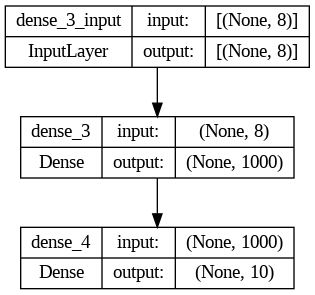

In [45]:
model = Sequential()
model.add(Dense(1000, input_dim=8, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
plot_model(model, to_file='tolp_ledom.png', show_shapes=True, show_layer_names=True)

Here we use the NearestNeighbors model to find the N nearest songs from a specific song (with a specific ID).

In [55]:
# Initialize the NearestNeighbors model

k_neighbors = 3
neighbors_model = NearestNeighbors(n_neighbors=k_neighbors, metric='euclidean')
neighbors_model.fit(important_features.values)
first_100 = specific_ids[1:100][:]


for target in first_100:
    if target in music_dataset['id'].values:
        matching_index = music_dataset.index[music_dataset['id'] == target].values[0]

        # Get the indices and distances of the k_neighbors closest neighbors to the query row
        distances, indices = neighbors_model.kneighbors([important_features.values[matching_index]])

        # Directly use iloc on the original DataFrame
        closest_neighbors = important_features.iloc[indices.flatten()].copy()

        # Explicitly create a copy before modifying
        closest_neighbors = closest_neighbors.copy()
        closest_neighbors['ID Neighbor'] = music_dataset['id'].iloc[indices.flatten()]
        closest_neighbors['Name Neighbor'] = music_dataset['name'].iloc[indices.flatten()]
        closest_neighbors['Artists Neighbor'] = music_dataset['artists'].iloc[indices.flatten()]

        # Print the indices and distances
        print(f"Indices of closest neighbors: \n{indices.flatten()}")
        print("\n")
        print(f"Distances to closest neighbors: \n{distances.flatten()}")
        print("\n")

        # Display the updated closest_neighbors DataFrame using tabulate
        print("Updated closest_neighbors:")
        print(tabulate(closest_neighbors[['ID Neighbor', 'Name Neighbor', 'Artists Neighbor']], headers='keys', tablefmt='fancy_grid'))
        print("------------------------------------------------------------------------------------------")

Indices of closest neighbors: 
[23594 60147 41841]


Distances to closest neighbors: 
[ 0.         12.99571834 15.24789356]


Updated closest_neighbors:
╒═══════╤════════════════════════╤═══════════════════════════════════════════╤════════════════════════════════════════╕
│       │ ID Neighbor            │ Name Neighbor                             │ Artists Neighbor                       │
╞═══════╪════════════════════════╪═══════════════════════════════════════════╪════════════════════════════════════════╡
│ 23594 │ 2JM8gahOI3qGGfab7L990F │ Otra Noche - Remasterizado                │ ['Francisco Canaro', 'Carlos Roldán']  │
├───────┼────────────────────────┼───────────────────────────────────────────┼────────────────────────────────────────┤
│ 60147 │ 1bro2Csf3xdi6wqZqJE9q4 │ Leña                                      │ ['Chapuseaux y Damirón']               │
├───────┼────────────────────────┼───────────────────────────────────────────┼────────────────────────────────────────┤
│ 41841

In [21]:
# Initialize the NearestNeighbors model

k_neighbors = 3
neighbors_model = NearestNeighbors(n_neighbors=k_neighbors, metric='euclidean')
neighbors_model.fit(important_features.values)
first_100 = specific_Κ_ids[1:70][:]


for target in first_100:
    if target in music_dataset['id'].values:
        matching_index = music_dataset.index[music_dataset['id'] == target].values[0]

        # Get the indices and distances of the k_neighbors closest neighbors to the query row
        distances, indices = neighbors_model.kneighbors([important_features.values[matching_index]])

        # Directly use iloc on the original DataFrame
        closest_neighbors = important_features.iloc[indices.flatten()].copy()

        # Explicitly create a copy before modifying
        closest_neighbors = closest_neighbors.copy()
        closest_neighbors['ID Neighbor'] = music_dataset['id'].iloc[indices.flatten()]
        closest_neighbors['Name Neighbor'] = music_dataset['name'].iloc[indices.flatten()]
        closest_neighbors['Artists Neighbor'] = music_dataset['artists'].iloc[indices.flatten()]

        # Print the indices and distances
        print(f"Indices of closest neighbors: \n{indices.flatten()}")
        print("\n")
        print(f"Distances to closest neighbors: \n{distances.flatten()}")
        print("\n")

        # Display the updated closest_neighbors DataFrame using tabulate
        print("Updated closest_neighbors:")
        print(tabulate(closest_neighbors[['ID Neighbor', 'Name Neighbor', 'Artists Neighbor']], headers='keys', tablefmt='fancy_grid'))
        print("------------------------------------------------------------------------------------------")

Indices of closest neighbors: 
[45442 97626 99529]


Distances to closest neighbors: 
[ 0.         10.97257328 20.58776204]


Updated closest_neighbors:
╒═══════╤════════════════════════╤══════════════════════════════════════════╤════════════════════════════════╕
│       │ ID Neighbor            │ Name Neighbor                            │ Artists Neighbor               │
╞═══════╪════════════════════════╪══════════════════════════════════════════╪════════════════════════════════╡
│ 45442 │ 0xHKpW4u861VAfCMtMvhdz │ What Shall We Do with the Drunken Sailor │ ['Traditional', 'Robert Shaw'] │
├───────┼────────────────────────┼──────────────────────────────────────────┼────────────────────────────────┤
│ 97626 │ 3UR5GYLSmvlPhJxvFZycOB │ Mr. Lucky                                │ ['Vince Guaraldi']             │
├───────┼────────────────────────┼──────────────────────────────────────────┼────────────────────────────────┤
│ 99529 │ 1Z8Ns9iDEgHHy6wb8JIF37 │ Hollywood                          